Reference: https://www.geeksforgeeks.org/comparing-anomaly-detection-algorithms-for-outlier-detection-on-toy-datasets-in-scikit-learn/

## What is an anomaly detection?

Anomaly is a deviation from the expected or normal behavior or pattern. Anomaly detection is the process of identifying these unusual patterns or behaviors in data.

One example of an anomaly in real life is a sudden spike in credit card usage. This could be an indication of fraudulent activity, such as someone using a stolen credit card.

## Concepts required for anomaly detection

#### Data:
Anomaly detection involves analyzing data to identify unusual patterns or behaviors.

#### Normal behavior: 
In order to identify anomalies, it is necessary to have a baseline or reference for what is considered normal behavior.

#### Anomaly: 
An anomaly is a deviation from the expected or normal behavior or pattern

#### Algorithms and techniques: 
Anomaly detection uses a variety of algorithms and techniques to analyze data and identify anomalies. 

#### Evaluation and validation: 
This may involve comparing the results to known anomalies, or using domain knowledge to interpret the findings.

## 1. Local Outlier Factor Algorithm:

### Concept:
In most datasets, the density of points is relatively uniform, with only a few points having significantly lower or higher densities than the rest. The LOF algorithm uses this property to identify points that have a significantly lower density than their neighbors, which are likely to be anomalies.

### Metric used: K-NN

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.neighbors import LocalOutlierFactor 

In [2]:
# Load the datasets:
df = load_iris(as_frame=True).frame 
X = df[['sepal length (cm)','sepal width (cm)']] 

In [3]:
lof = LocalOutlierFactor(n_neighbors=5) 

In [4]:
lof.fit(X) 

LocalOutlierFactor(n_neighbors=5)

In [5]:
# Calculate the outlier scores for each point 
scores = lof.negative_outlier_factor_
  
# Identify the points with the highest outlier scores 
outliers = np.argwhere(scores > np.percentile(scores, 95)) 
  

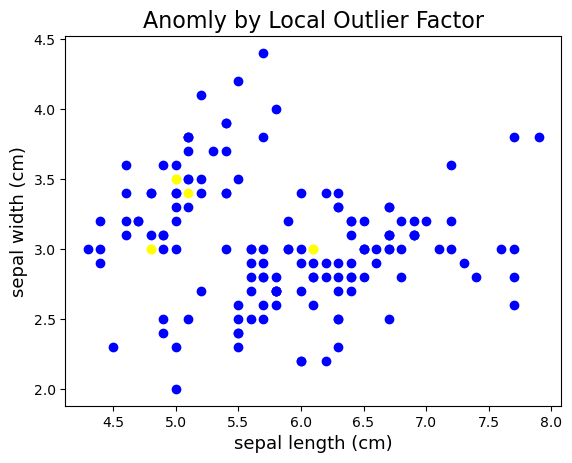

In [7]:
# Plot anomaly
colors=['blue','yellow'] 

for i in range(len(X)): 
    if i not in outliers: 
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomaly 
    else: 
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomaly 
plt.xlabel('sepal length (cm)',fontsize=13) 
plt.ylabel('sepal width (cm)',fontsize=13)         
plt.title('Anomly by Local Outlier Factor',fontsize=16)         
plt.show() 

## 2. Isolation Forest

### Metric used: Decision Trees

### Concept:
The basic idea is that, in most datasets, the majority of points can be reached in the decision tree with only a few splits. Anomalies, on the other hand, are typically isolated from the rest of the data, requiring many splits to reach them in the decision tree. 

In [8]:
# Import the necessary modules 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.ensemble import IsolationForest 

In [9]:
df = load_iris(as_frame=True).frame 
X = df[['sepal length (cm)','sepal width (cm)']] 

In [10]:
# Define the model and set the contamination level 
model = IsolationForest(contamination=0.05) 

### contamination : 'auto' or float, default='auto'

The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the scores of the samples.

If float, the contamination should be in the range (0, 0.5].

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


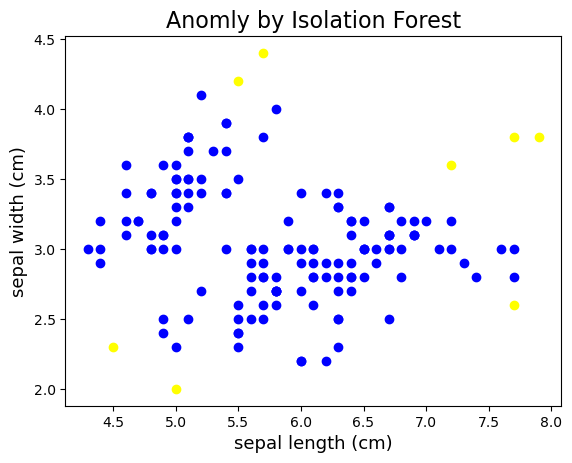

In [12]:
# Fit the model to the data 
model.fit(X) 
  
# Calculate the outlier scores for each point 
scores = model.decision_function(X) 
  
# Identify the points with the highest outlier scores 
outliers = np.argwhere(scores < np.percentile(scores, 5)) 
  
# Plot anomly 
colors=['blue','yellow'] 
  
for i in range(len(X)): 
    if i not in outliers: 
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomly 
    else: 
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomly 
plt.xlabel('sepal length (cm)',fontsize=13) 
plt.ylabel('sepal width (cm)',fontsize=13)         
plt.title('Anomly by Isolation Forest',fontsize=16)         
plt.show()

### 3. One-class Support Vector Machines (SVMs) are another popular approach to anomaly detection.

To be done after SVM task.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn import svm 

In [3]:
df = load_iris(as_frame=True).frame 
X = df[['sepal length (cm)','sepal width (cm)']] 
  
# Define the model and set the nu parameter 
model = svm.OneClassSVM(nu=0.05) 

In [4]:
model.fit(X) 
  
# Calculate the outlier scores for each point 
scores = model.decision_function(X) 
  
# Identify the points with the highest outlier scores 
outliers = np.argwhere(scores < np.percentile(scores, 5)) 

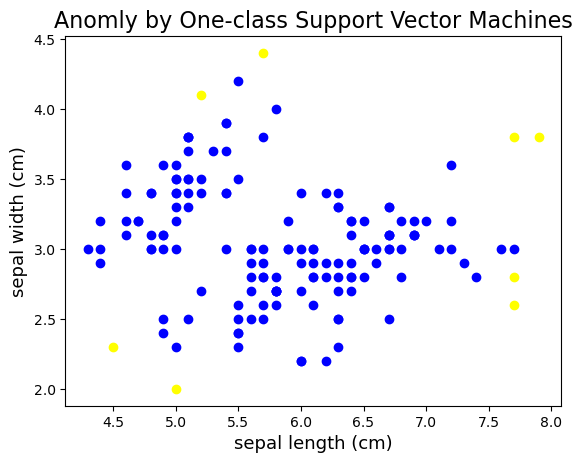

In [6]:
# Plot anomly 
colors=['blue','yellow'] 
  
for i in range(len(X)): 
    if i not in outliers: 
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomly 
    else: 
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomly 
plt.xlabel('sepal length (cm)',fontsize=13) 
plt.ylabel('sepal width (cm)',fontsize=13)         
plt.title('Anomly by One-class Support Vector Machines',fontsize=16)         
plt.show()

## 4. Elliptical Envelope

 This algorithm fits an ellipse around the data, and identifies points that fall outside of the ellipse as anomalies. The basic idea is that, in a normally distributed dataset, most of the points will fall within the ellipse, while anomalies will fall outside of it

In [13]:
# Import the necessary modules 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.covariance import EllipticEnvelope 

In [14]:
df = load_iris(as_frame=True).frame 
X = df[['sepal length (cm)','sepal width (cm)']] 

In [15]:
# Define the model and set the contamination level 
model = EllipticEnvelope(contamination=0.05) 
  
# Fit the model to the data 
model.fit(X) 
  
# Calculate the outlier scores for each point 
scores = model.decision_function(X) 

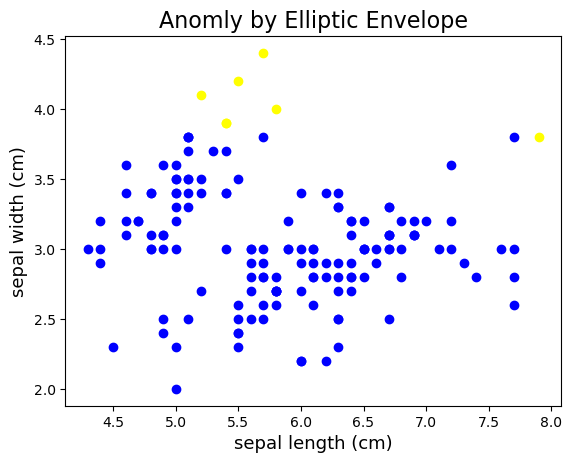

In [17]:
# Identify the points with the highest outlier scores 
outliers = np.argwhere(scores < np.percentile(scores, 5)) 
  
# Plot anomly 
colors=['blue','yellow'] 
  
for i in range(len(X)): 
    if i not in outliers: 
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomly 
    else: 
        plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomly 
plt.xlabel('sepal length (cm)',fontsize=13) 
plt.ylabel('sepal width (cm)',fontsize=13)         
plt.title('Anomly by Elliptic Envelope',fontsize=16)         
plt.show()